In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

### Multi feature
1) 상관 관계: corr (상관 관계가 낮은 컬림은 제거)   
2) 다중공선성: statesmodel (혈중 알콜 농도와 음주운전 처럼 매우 높은 상관 관계를 갖는것 중 하나 선택)   
3) **정규화(무조건)**   
4) 검정: 연속데이터(결정계수), 분류(주로 f1 score(그 외 정확도), ROC 커브, confusion matrix)   

In [3]:
data = [[828, 920, 1234567, 1020, 1111],
            [824, 910, 2345612, 1090, 1234],
            [880, 900, 3456123, 1010, 1000],
            [870, 990, 2312123, 1001, 1122],
            [860, 980, 3223123, 1008, 1133],
            [850, 970, 2432123, 1100, 1221]]
df = pd.DataFrame( data )
df

,0,1,2,3,4
0,828,920,1234567,1020,1111
1,824,910,2345612,1090,1234
2,880,900,3456123,1010,1000
3,870,990,2312123,1001,1122
4,860,980,3223123,1008,1133
5,850,970,2432123,1100,1221


In [56]:
df.corr()

,0,1,2,3,4
0,1.000000,0.306770,0.721605,-0.565687,-0.668206
1,0.306770,1.000000,0.059152,-0.145378,0.281093
2,0.721605,0.059152,1.000000,-0.176519,-0.354869
3,-0.565687,-0.145378,-0.176519,1.000000,0.804104
4,-0.668206,0.281093,-0.354869,0.804104,1.000000


In [58]:
!pip install seaborn

     -------------------------------------- 285.1/285.1 kB 8.9 MB/s eta 0:00:00


In [59]:
import seaborn as sb

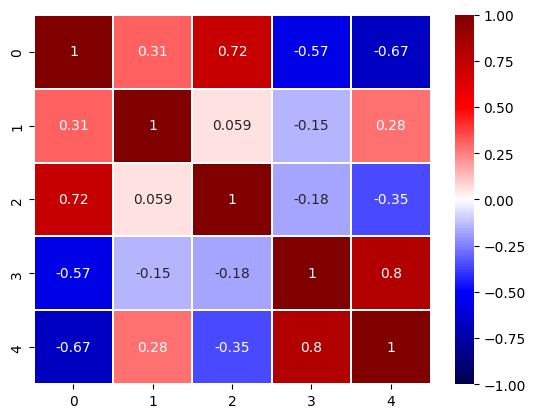

In [65]:
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot=True, 
           linewidths=0.2, cmap='seismic')
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.show()

In [7]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,[-1]]

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [29]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform(x_data)

In [30]:
x_dataN

array([[0.07142857, 0.22222222, 0.        , 0.19191919],
       [0.        , 0.11111111, 0.50012019, 0.8989899 ],
       [1.        , 0.        , 1.        , 0.09090909],
       [0.82142857, 1.        , 0.48504562, 0.        ],
       [0.64285714, 0.88888889, 0.89511856, 0.07070707],
       [0.46428571, 0.77777778, 0.53906181, 1.        ]])

In [31]:
scaleL = MinMaxScaler()
y_dataN = scaleL.fit_transform(y_data)

In [32]:
y_dataN

array([[0.47435897],
       [1.        ],
       [0.        ],
       [0.52136752],
       [0.56837607],
       [0.94444444]])

In [51]:
x = torch.FloatTensor(x_dataN)
y = torch.FloatTensor(y_dataN)
w = torch.empty([4,1], requires_grad=True)
b = torch.empty(1, requires_grad=True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.6868], requires_grad=True)

In [52]:
def cost():
    hx = torch.matmul(x, w) + b
    c = torch.mean((hx-y)**2)
    return c

In [53]:
hist = []
optimizer = Adam([w, b], lr = 0.01)
for epoch in range(1000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    print(epoch, c.item())
    hist.append(c.item())

0 1.6406885385513306
1 1.5704158544540405
2 1.5020462274551392
3 1.4356108903884888
4 1.3711384534835815
5 1.3086538314819336
6 1.248179316520691
7 1.1897329092025757
8 1.1333286762237549
9 1.078977346420288
10 1.0266846418380737
11 0.9764525890350342
12 0.9282777309417725
13 0.8821527361869812
14 0.8380650877952576
15 0.7959973812103271
16 0.7559273838996887
17 0.7178280353546143
18 0.681666910648346
19 0.6474072337150574
20 0.6150074601173401
21 0.5844212174415588
22 0.5555983185768127
23 0.5284839868545532
24 0.5030200481414795
25 0.479144811630249
26 0.4567936658859253
27 0.4358995258808136
28 0.4163931608200073
29 0.3982038199901581
30 0.3812599182128906
31 0.36548924446105957
32 0.3508196771144867
33 0.33717969059944153
34 0.3244989514350891
35 0.31270864605903625
36 0.30174192786216736
37 0.29153427481651306
38 0.28202390670776367
39 0.2731519937515259
40 0.2648627460002899
41 0.2571037709712982
42 0.24982602894306183
43 0.24298398196697235
44 0.23653532564640045
45 0.2304413169

557 0.008298954926431179
558 0.008283045142889023
559 0.008267172612249851
560 0.008251345716416836
561 0.008235548622906208
562 0.008219792507588863
563 0.008204077370464802
564 0.008188393898308277
565 0.008172750473022461
566 0.00815714243799448
567 0.00814158096909523
568 0.008126054890453815
569 0.008110561408102512
570 0.008095107041299343
571 0.00807968806475401
572 0.008064305409789085
573 0.008048965595662594
574 0.008033660240471363
575 0.008018390275537968
576 0.008003161288797855
577 0.007987963035702705
578 0.007972811348736286
579 0.00795768667012453
580 0.007942602038383484
581 0.007927559316158295
582 0.007912546396255493
583 0.007897571660578251
584 0.007882635109126568
585 0.007867731153964996
586 0.00785286445170641
587 0.00783803965896368
588 0.007823245599865913
589 0.007808491121977568
590 0.007793765049427748
591 0.007779082749038935
592 0.007764436304569244
593 0.007749824319034815
594 0.007735249120742083
595 0.007720705587416887
596 0.00770619697868824
597 0.0

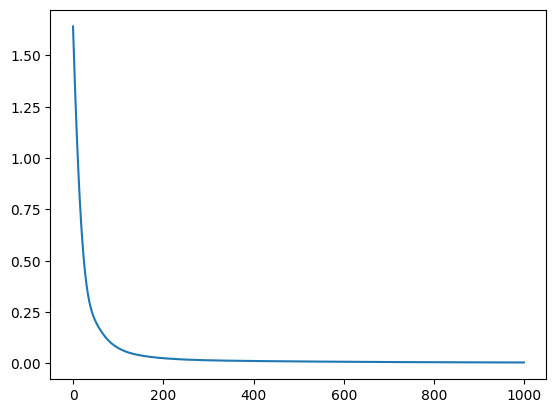

In [54]:
plt.plot(hist)
plt.show()

In [36]:
w

tensor([[-0.5231],
        [ 0.4442],
        [ 0.1252],
        [ 0.4667]], requires_grad=True)

In [37]:
b

tensor([0.3775], requires_grad=True)

In [38]:
def hxFn(xd):
    xd = torch.FloatTensor(xd)
    hx = torch.matmul(xd, w) + b
    return hx.detach().numpy()

In [44]:
# 828, 920, 1234567, 1020
# hxFn([[828, 920, 1234567, 1020]]) X
# 정규화된 값을 입력해야함

xn = scaleF.transform([[828, 920, 1234567, 1020]])
p = hxFn(xn)
p

array([[0.37747455]], dtype=float32)

In [46]:
scaleL.inverse_transform(p)

array([[1088.3291]], dtype=float32)

## w,b검정지표: 결정계수(선형회귀)
- 0 <= 결정계수 <= 1 (0.5 이상이면 예측으로 활용가능하다.)
- 1 - (오차의 제곱합)/(편차의 제곱합)
- 오차: 실제 값과 예측 값의 차이
- 편차: 실제 값과 평균 값의 차이

In [47]:
from sklearn.metrics import r2_score

In [48]:
pred = hxFn(x)

In [49]:
r2_score(y_dataN, pred)

0.9675296452887073